In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# считываем датасет
df=pd.read_csv('bank (10).csv',sep=";")
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
23611,32,management,married,tertiary,no,864,yes,no,cellular,28,aug,17,19,-1,0
161,39,technician,single,tertiary,no,47,yes,no,unknown,5,may,181,1,-1,0
13148,28,blue-collar,married,secondary,no,2322,no,no,cellular,8,jul,82,4,-1,0
17889,34,management,married,tertiary,no,13,yes,no,cellular,30,jul,99,3,-1,0
33947,46,blue-collar,married,secondary,no,1603,no,no,cellular,30,apr,279,1,-1,0
2661,26,blue-collar,single,secondary,no,-214,yes,no,unknown,13,may,86,4,-1,0
24823,38,entrepreneur,divorced,secondary,no,36,no,no,cellular,18,nov,84,2,-1,0
14617,45,self-employed,married,tertiary,no,0,yes,yes,cellular,15,jul,372,4,-1,0
40180,51,technician,married,tertiary,no,1315,no,no,telephone,5,jun,303,2,-1,0
6720,25,blue-collar,single,secondary,no,1966,yes,no,unknown,28,may,209,1,-1,0


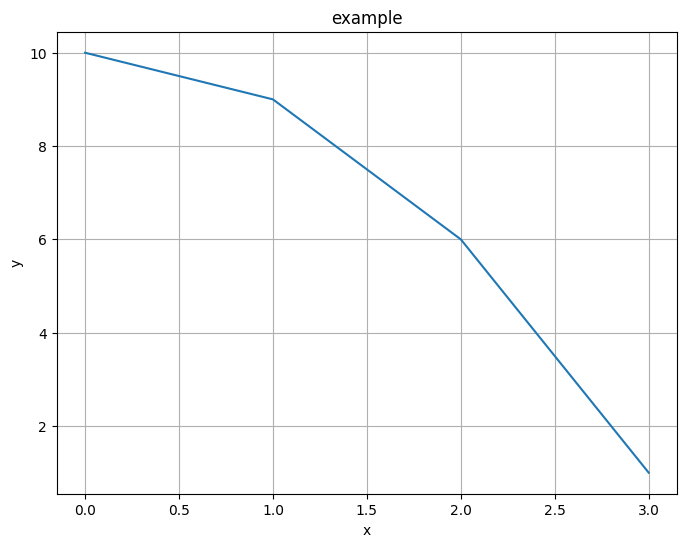

In [4]:
plt.figure(figsize=(8,6))
plt.plot([0,1,2,3],[10,9,6,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('example')
plt.grid();

# виды графикоф

# ленейные

In [5]:
#  готовим данные для графика во виде сводные таблецы
data=df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


### matplotlip

Text(0, 0.5, 'кол-во клиентов')

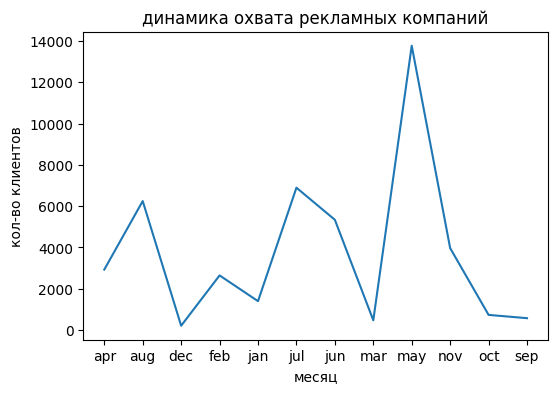

In [6]:
plt.figure(figsize=(6,4))
plt.plot(data['month'],data['count'])
plt.title('динамика охвата рекламных компаний')
plt.xlabel('месяц')
plt.ylabel('кол-во клиентов')


# seaborn

Text(0, 0.5, 'кол-во клиентов')

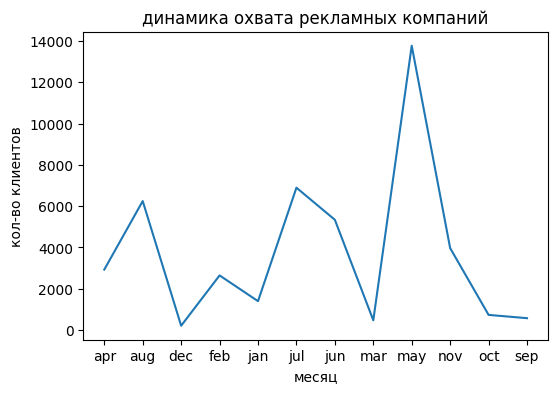

In [7]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data['month'],y=data['count'])
plt.title('динамика охвата рекламных компаний')
plt.xlabel('месяц')
plt.ylabel('кол-во клиентов')

          

### гистограмма

### maltolip

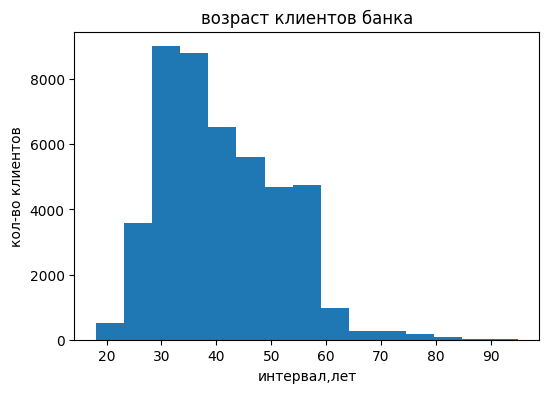

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df['age'],bins=15)
plt.title('возраст клиентов банка')
plt.xlabel('интервал,лет')
plt.ylabel('кол-во клиентов');


### seaborn

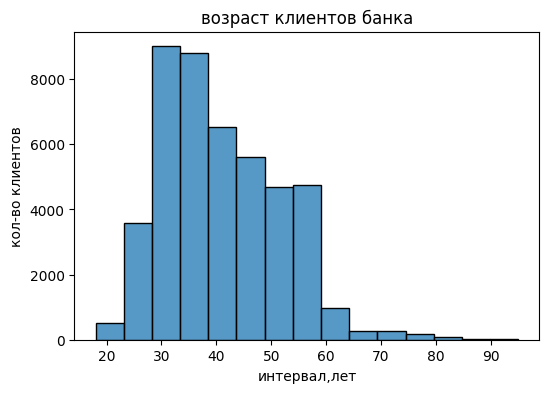

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'],bins=15)
plt.title('возраст клиентов банка')
plt.xlabel('интервал,лет')
plt.ylabel('кол-во клиентов');


## диаграмма рассеяния

## matplotlip

In [10]:
# готовим данные для графика во виде сводной таблицы
data=df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


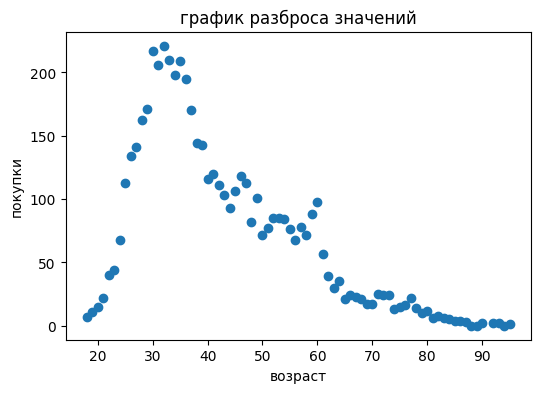

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(data['age'],data['convert'])
plt.title('график разброса значений')
plt.xlabel('возраст')
plt.ylabel('покупки');

### seaborn

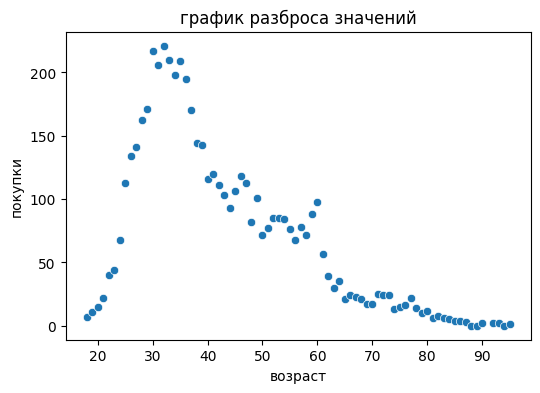

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['age'],y=data['convert'])
plt.title('график разброса значений')
plt.xlabel('возраст')
plt.ylabel('покупки');

### столбчатые диаграммы

In [13]:
# готовим данные для графика
data=df['job'].value_counts().reset_index()
data.head()

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


### matplotlip

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x=data['index'], y=data['job'])
plt.title('род занятий клиентов банка')
plt.xlabel('род занятий')
plt.ylabel('кол-во')
plt.xticks(rotation=30);

KeyError: 'index'

<Figure size 600x400 with 0 Axes>

# многорядовые столбчатые диаграммы

In [ ]:
# готовим данные для графика
data=pd.crosstab(df['job'],df['convert']).reset_index().sort_values(by=0,ascending=False)
data.rename(columns={0:'no',1:'yes'},inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


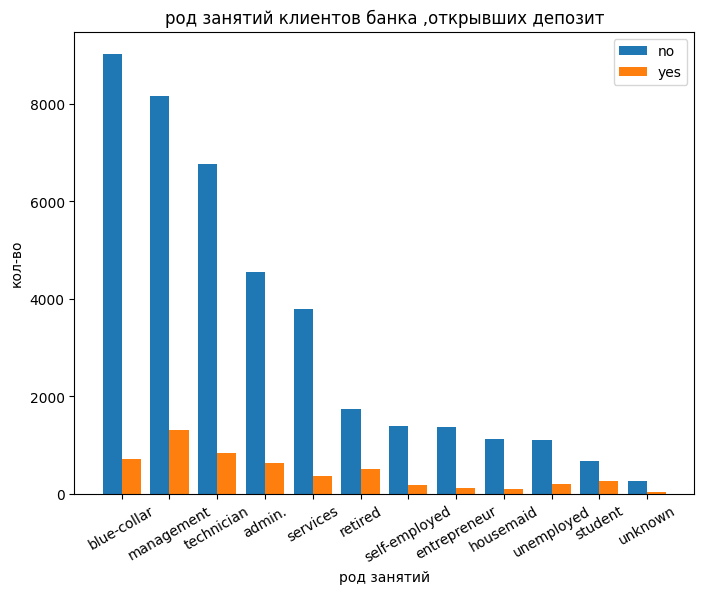

In [ ]:
# строим столбчатую многодиграмную фигуру
plt.figure(figsize=(8,6))
# определяем кол-во делений
n_ticks=np.arange(len(data['no']))
# определяем сдвиг
offset=0.2
# определяем ширину стольбцов
w=0.4
# добавляем сдвиг ко количеству делений
plt.bar(n_ticks-offset,data['no'],width=w)
plt.bar(n_ticks+offset,data['yes'],width=w)
plt.title('род занятий клиентов банка ,открывших депозит')
plt.xlabel('род занятий')
plt.ylabel('кол-во')
plt.legend(['no','yes'])
plt.xticks(n_ticks,data['job'],rotation=30);#добавляем метки деления
          

## сложенная стольбчатая диаграммф

In [ ]:
# готовим данные для графика 
data=pd.crosstab(df['job'],df['convert'],normalize='index').reset_index().sort_values(by=0,ascending=False)
data.rename(columns={0:'no',1:'yes'},inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


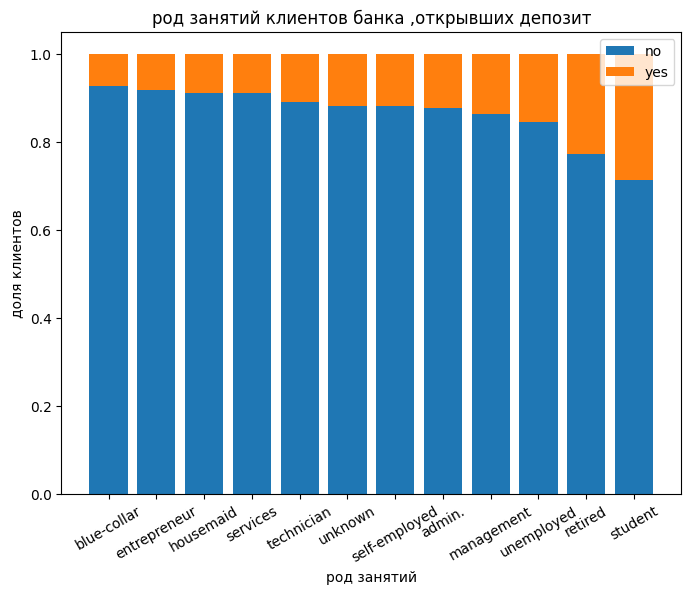

In [ ]:
# строим столбчатую многодиграмную сложную диаграмму
plt.figure(figsize=(8,6))

plt.bar(data['job'],data['no'])
plt.bar(data['job'],data['yes'],bottom=data['no'])
plt.title('род занятий клиентов банка ,открывших депозит')
plt.xlabel('род занятий')
plt.ylabel('доля клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation=30);
          

# ящики с усами

In [ ]:
# готовим данные для графика 
data1=df['duration'][df['convert']==1]
data2=df['duration'][df['convert']==0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

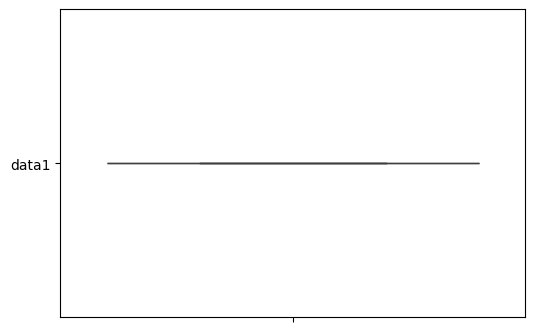

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=['data1']);

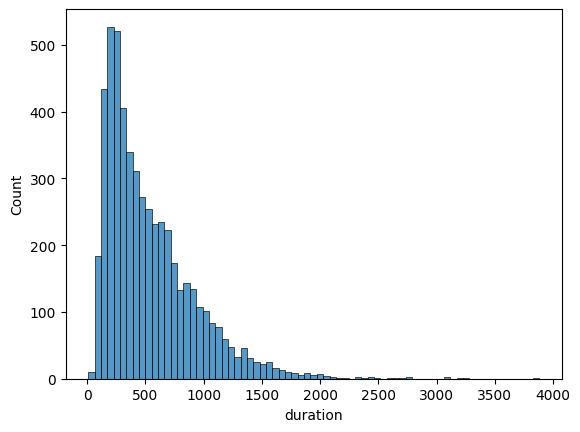

In [ ]:
sns.histplot(x=data1);

# matplolip

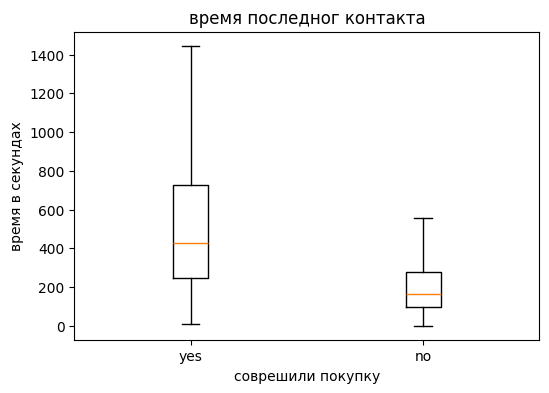

In [ ]:
# строим боксплот
plt.figure(figsize=(6,4))
plt.boxplot([data1,data2],showfliers=False)
plt.title('время последног контакта')
plt.xlabel('соврешили покупку')
plt.ylabel('время в секундах')
plt.xticks([1,2],['yes','no']);

# seaborn

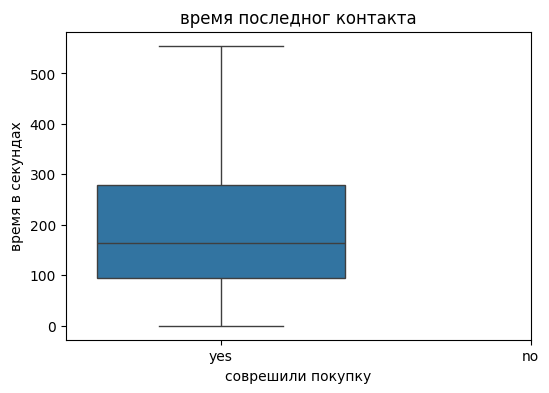

In [ ]:
# строим боксплот без выбросов
plt.figure(figsize=(6,4))
sns.boxplot(data=[data1,data2], showfliers=False)
plt.title('время последног контакта')
plt.xlabel('соврешили покупку')
plt.ylabel('время в секундах')
plt.xticks([0,1],['yes','no']);

# круговая диаграмма

In [16]:
# готвим данные для графика 
data= df['convert'].value_counts()
data.index=['no','yes']
data.head()

no     39922
yes     5289
Name: count, dtype: int64

# matplotlip

NameError: name 'index' is not defined

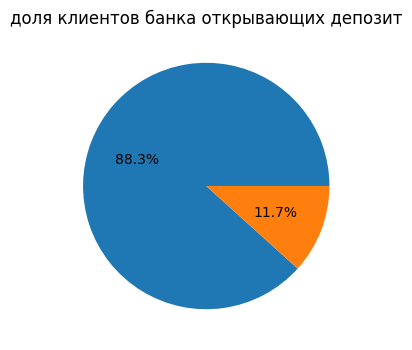

In [17]:
# строим круговую диаграмму
plt.figure(figsize=(6,4))
plt.pie(data,autopct='%1.1f%%')
plt.title('доля клиентов банка открывающих депозит')
plt.legend(data,index);

# визуальный анализ данных

# домашние задания

In [18]:
df=pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


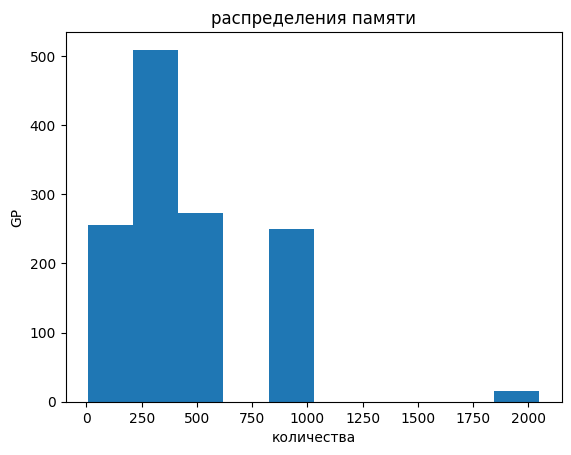

In [22]:
# Изучите количество памяти с помощью matplotlib
import matplotlib.pyplot as plt
plt.hist(df['Memory_Amount'])
plt.title("распределения памяти")
plt.xlabel('количества')
plt.ylabel('GP');

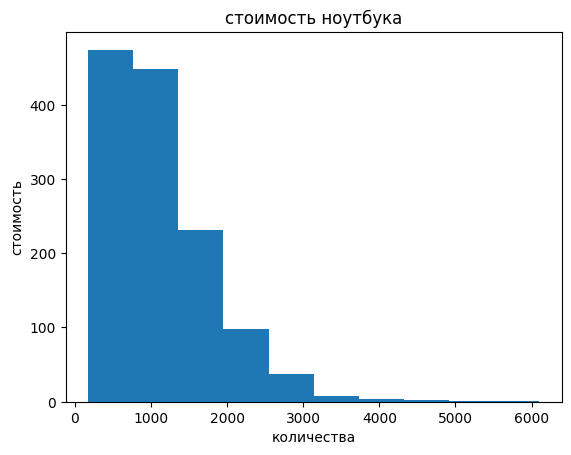

In [25]:
#Изучите стоимость ноутбуков с помощью matplotlib
plt.hist(df['Price_euros'])
plt.title("стоимость ноутбука")
plt.xlabel('количества')
plt.ylabel('стоимость');

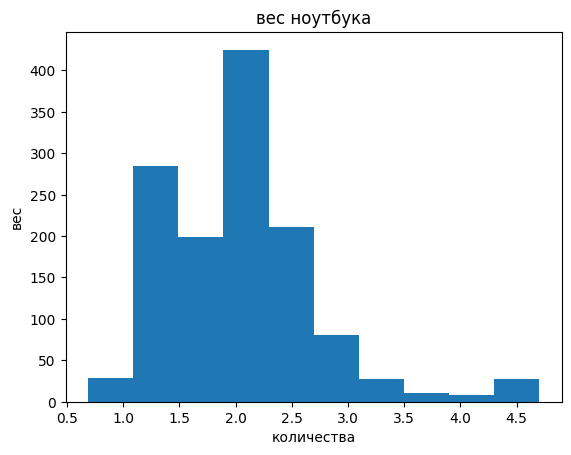

In [26]:
#Изучите вес ноутбуков с помощью matplotlib
plt.hist(df['Weight'])
plt.title("вес ноутбука")
plt.xlabel('количества')
plt.ylabel('вес');

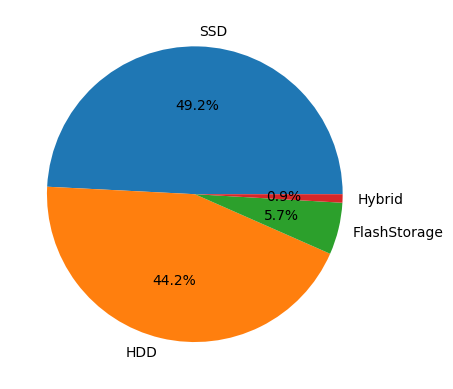

In [30]:
# 2.1 Изучите распределение типов носителя
data=df['Memory_Type'].value_counts()
names=data.index
values=data.values
plt.pie(values,autopct='%.1f%%',labels=names);

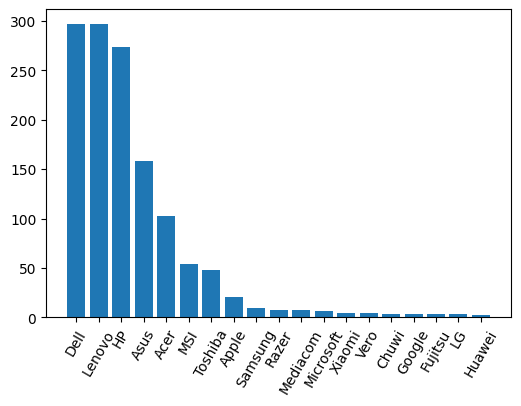

In [35]:
#2.2 Изучите распределение компаний производителей
data=df['Company'].value_counts()
names=data.index
values=data.values
plt.figure(figsize=(6,4))
plt.bar(names,values)
plt.xticks(rotation=60);


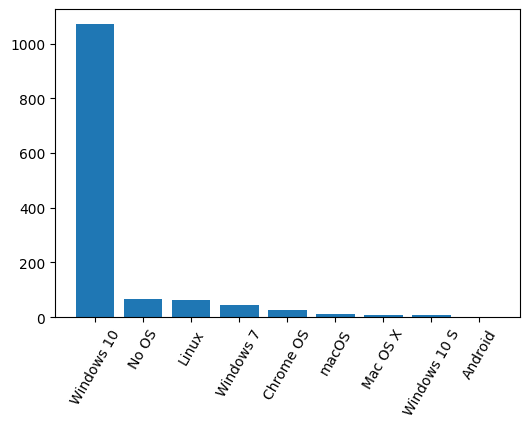

In [38]:
#2.3 Изучите распределение операционной системы
data=df['OpSys'].value_counts()
names=data.index
values=data.values
plt.figure(figsize=(6,4))
plt.bar(names,values)
plt.xticks(rotation=60);

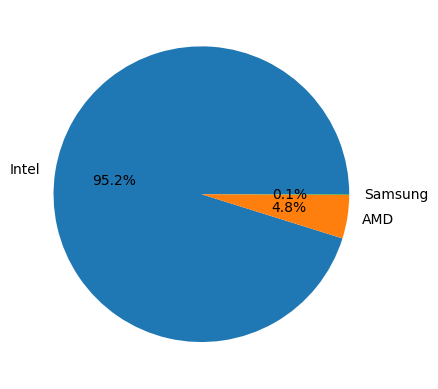

In [40]:
# 2.4 Изучите распределение компаний производителей CPU
data=df['Cpu_Company'].value_counts()
names=data.index
values=data.values
plt.pie(values,autopct='%.1f%%',labels=names);

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах




C:\Users\Hp\AppData\Local\Temp\ipykernel_14956\3429667483.py:12: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['AMD'],['Intel'])


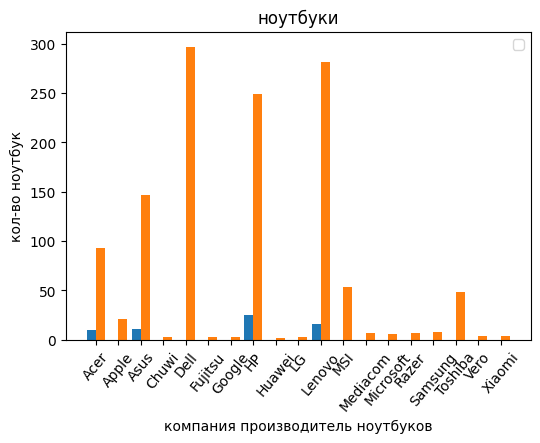

In [47]:
data=pd.crosstab(index=df['Company'],columns=df['Cpu_Company']).drop(columns="Samsung").reset_index()
import numpy as np
plt.figure(figsize=(6,4))
n_ticks=np.arange(len(data['AMD']))
offset=0.2
w=0.4
plt.bar(n_ticks-offset,data['AMD'],width=w)
plt.bar(n_ticks+offset,data['Intel'],width=w)
plt.title("ноутбуки")
plt.xlabel('компания производитель ноутбуков')
plt.ylabel('кол-во ноутбук')
plt.legend(['AMD'],['Intel'])
plt.xticks(n_ticks,data['Company'],rotation=50);


C:\Users\Hp\AppData\Local\Temp\ipykernel_14956\3941142791.py:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['AMD'],['Intel'])


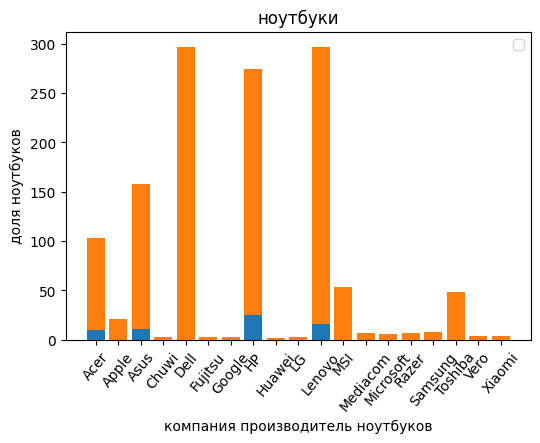

In [48]:
#3.2 Постройте график в относительных величинах
data=pd.crosstab(index=df['Company'],columns=df['Cpu_Company']).drop(columns="Samsung").reset_index()
import numpy as np
plt.figure(figsize=(6,4))
plt.bar(data['Company'],data['AMD'])
plt.bar(data['Company'],data['Intel'],bottom=data['AMD'])
plt.title("ноутбуки")
plt.xlabel('компания производитель ноутбуков')
plt.ylabel('доля ноутбуков')
plt.legend(['AMD'],['Intel'])
plt.xticks(rotation=50);

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы


Text(0, 0.5, 'Cpu_Company')

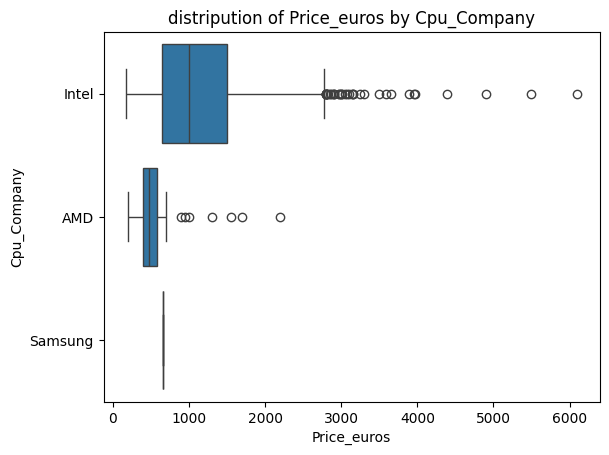

In [50]:
import seaborn as sns
plt.Figure(figsize=(10,6))
sns.boxplot(x=df['Price_euros'],y=df['Cpu_Company'],whis=1.5)
plt.title("distripution of Price_euros by Cpu_Company")
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company')


Text(0, 0.5, 'Memory_Type')

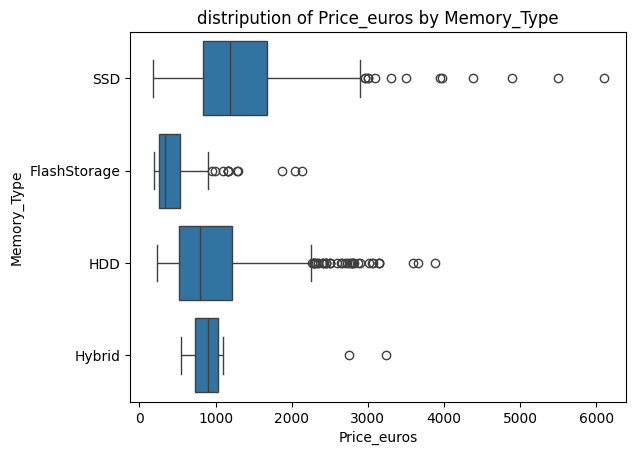

In [51]:
import seaborn as sns
plt.Figure(figsize=(10,6))
sns.boxplot(x=df['Price_euros'],y=df['Memory_Type'],whis=1.5)
plt.title("distripution of Price_euros by Memory_Type")
plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')


Text(0, 0.5, 'Ram')

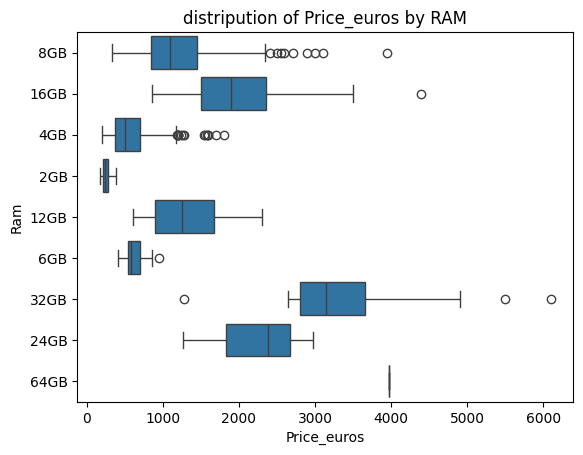

In [53]:
import seaborn as sns
plt.Figure(figsize=(10,6))
sns.boxplot(x=df['Price_euros'],y=df['Ram'],whis=1.5)
plt.title("distripution of Price_euros by RAM")
plt.xlabel('Price_euros')
plt.ylabel('Ram')


Text(0, 0.5, 'Company')

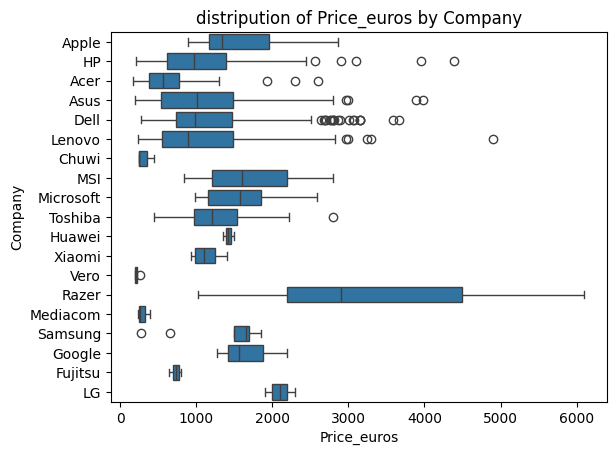

In [55]:
import seaborn as sns
plt.Figure(figsize=(10,6))
sns.boxplot(x=df['Price_euros'],y=df['Company'],whis=1.5)
plt.title("distripution of Price_euros by Company")
plt.xlabel('Price_euros')
plt.ylabel('Company')

Постройте матрицу корреляций для таблицы


               Inches  Weight  Price_euros  Memory_Amount
Inches            1.0     0.8          0.0            0.3
Weight            0.8     1.0          0.0            0.0
Price_euros       0.0     0.0          1.0            0.0
Memory_Amount     0.3     0.0          0.0            1.0


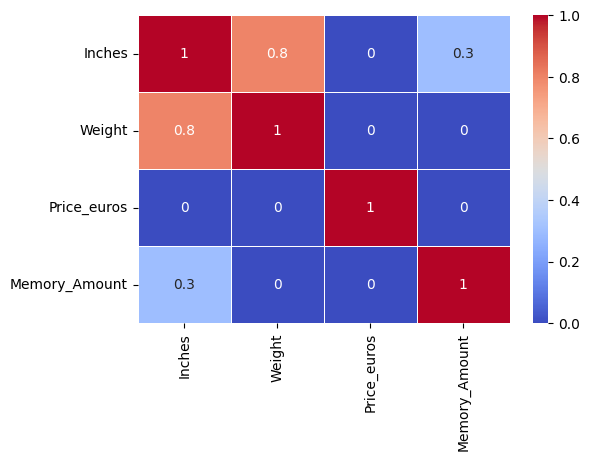

In [60]:
cor_matrix=df.corr(numeric_only=True)
cor_matrix=np.around(cor_matrix,1)
cor_matrix[np.abs(cor_matrix<0.3)]=0
print(cor_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(cor_matrix,annot=True,linewidths=.5,cmap='coolwarm')
plt.show()